<a href="https://colab.research.google.com/github/HagarIbrahiem/ML-Supervised-and-Unsupervised-Learning/blob/main/FMNIST%20%7C%20%20Custom%20Models%2C%20Layers%2C%20Loss%20Functions%2C%20and%20Callbacks%20%7CTensorFlow%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Basic classification: Classify images of clothing

This notebook trains a neural network model to classify images of clothing, like sneakers and shirts.

The notebook usesthe [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories.


## Import Libs

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import datetime

import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer

print(tf.__version__)

2.12.0


## Load Data

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [ ]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [ ]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [ ]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [ ]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

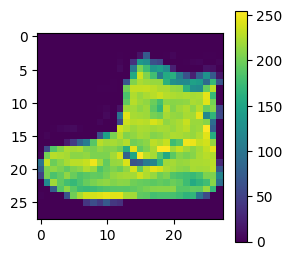

In [ ]:
plt.figure(figsize=(3,3))
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

 let's display the first 15 images from the *training set* and display the class name below each image.

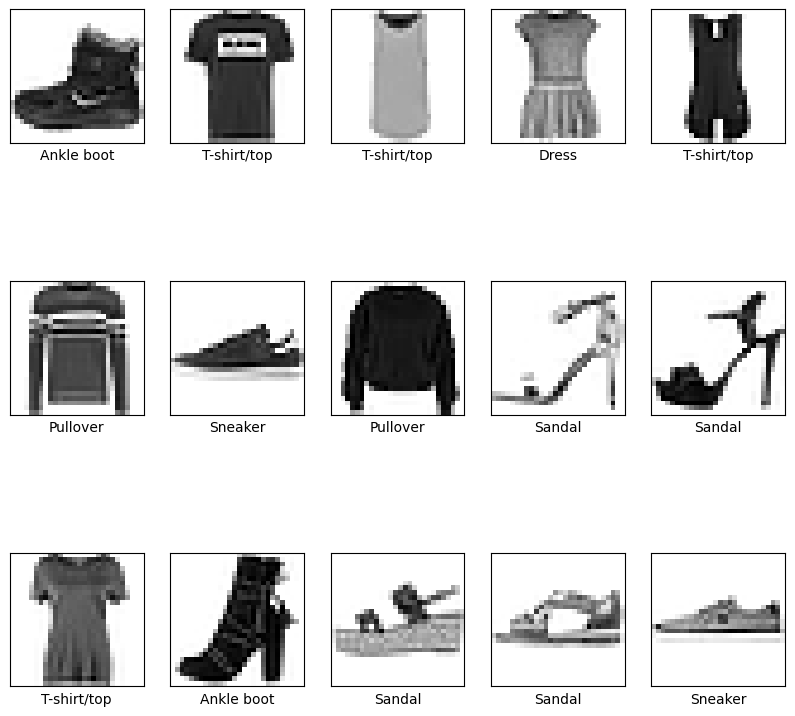

In [ ]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers



### 1- Custom Layer | Lambda
Define custom layers with the [Lambda](https://keras.io/api/layers/core_layers/lambda/) layer. WE can either use:
- [lambda functions](https://www.w3schools.com/python/python_lambda.asp) within the Lambda layer ,or
- Define a custom function that the Lambda layer will call.

In [ ]:
# Define a custom function that the Lambda layer will call.
def my_relu(x):
    return K.maximum(-0.1, x)


### 2- Custom Layer Class

Define a custom layer that inherits the [Layer](https://keras.io/api/layers/base_layer/#layer-class) class. Unlike simple Lambda layers we did previously, the custom layer here will contain weights that can be updated during training.


To make custom layer that is trainable, we need to define a class that inherits the [Layer](https://keras.io/api/layers/base_layer/#layer-class) base class from Keras. This class requires three functions:
- `__init__()`,
- `build()` and
-  `call()`.

 These ensure that our custom layer has a *state* and *computation* that can be accessed during training or inference.


 **P.S.** : To use the built-in **activations within Custome Layer Class**, we can specify an `activation` parameter in the `__init__()` method of our custom layer class.

 From there, we can initialize it by using the `tf.keras.activations.get()` method. This takes in a string identifier that corresponds to one of the [available activations](https://keras.io/api/layers/activations/#available-activations) in Keras.

  Next, you can now pass in the forward computation to this activation in the `call()` method.

In [ ]:
class SimpleDense(Layer):

    # add an activation parameter
    def __init__(self, units=32, activation=None):
        super(SimpleDense, self).__init__()
        self.units = units

        # define the activation to get from the built-in activation layers in Keras
        self.activation = tf.keras.activations.get(activation)


    def build(self, input_shape):
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(name="kernel",
            initial_value=w_init(shape=(input_shape[-1], self.units),
                                 dtype='float32'),
            trainable=True)
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(name="bias",
            initial_value=b_init(shape=(self.units,), dtype='float32'),
            trainable=True)
        super().build(input_shape)


    def call(self, inputs):

        # pass the computation to the activation layer
        return self.activation(tf.matmul(inputs, self.w) + self.b)

### 3- Custom Model

In [ ]:
class MyIdentityBlock(tf.keras.Model):
    def __init__(self, filters, kernel_size):
        super(MyIdentityBlock, self).__init__(name='')

        self.conv1 = tf.keras.layers.Conv2D(filters, kernel_size, padding='same')
        self.bn1 = tf.keras.layers.BatchNormalization()

        self.conv2 = tf.keras.layers.Conv2D(filters, kernel_size, padding='same')
        self.bn2 = tf.keras.layers.BatchNormalization()

        self.act = tf.keras.layers.Activation('relu')
        self.add = tf.keras.layers.Add()

    def call(self, input_tensor):
        x = self.conv1(input_tensor)
        x = self.bn1(x)
        x = self.act(x)

        x = self.conv2(x)
        x = self.bn2(x)

        x = self.add([x, input_tensor])
        x = self.act(x)
        return x

In [ ]:
model = tf.keras.Sequential([

    #transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels).
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128),

    # # Custom SubModel| Block
    # # Use the Identity blocks that you just defined
    # MyIdentityBlock(128, 3),


    # Custom Lambda Layer : Custome Fun used by Lambda Layer (2nd way)|  Pass in a function defined outside the model.
    tf.keras.layers.Lambda(my_relu),
    # Custom Lambda Layer: Define Custom Lambda Layer (1nd way)
    tf.keras.layers.Lambda(lambda x: tf.abs(x)),

    # Custom Layer Class | Without Activation
    SimpleDense(128),
    # Custom Layer Class | With Activation
    SimpleDense(128, activation='relu'),

    tf.keras.layers.Dense(10 , activation='softmax')
])

## Compile Model

### 4- Custom loss function
Define the custom loss function below called `my_rmse()` that returns the RMSE between the target (`y_true`) and prediction (`y_pred`).


In [ ]:
def my_crossentropy(y_true, y_pred):
    # Define your custom loss function
    loss = tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred)
    return loss

In [ ]:
model.compile(optimizer='adam',
              loss=my_crossentropy,
              metrics=['accuracy'])

## Train Model



### 5- Custom Callbacks

A custom callback is a powerful tool to customize the behavior of a Keras model during training, evaluation, or inference.


Define a simple custom callback to track
- the start and
- the end of every batch of data.

 During those calls, it prints the index of the current batch.

In [ ]:
class MyCustomCallback(tf.keras.callbacks.Callback):

    def on_train_batch_begin(self, batch, logs=None):
        print('Training: batch {} begins at {}'.format(batch, datetime.datetime.now().time()))

    # def on_train_batch_end(self, batch, logs=None):
    #     print('Training: batch {} ends at {}'.format(batch, datetime.datetime.now().time()))

In [ ]:
class DetectOverfittingCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold=0.7):
        super(DetectOverfittingCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        ratio = logs["val_loss"] / logs["loss"]
        print("Epoch: {}, Val/Train loss ratio: {:.2f}".format(epoch, ratio))

        if ratio > self.threshold:
            print("Stopping training...")
            self.model.stop_training = True

### An overview of callback methods

#### Common methods for training/testing/predicting
For training, testing, and predicting, following methods are provided to be overridden.
#### `on_(train|test|predict)_begin(self, logs=None)`
Called at the beginning of `fit`/`evaluate`/`predict`.
#### `on_(train|test|predict)_end(self, logs=None)`
Called at the end of `fit`/`evaluate`/`predict`.
#### `on_(train|test|predict)_batch_begin(self, batch, logs=None)`
Called right before processing a batch during training/testing/predicting. Within this method, `logs` is a dict with `batch` and `size` available keys, representing the current batch number and the size of the batch.
#### `on_(train|test|predict)_batch_end(self, batch, logs=None)`
Called at the end of training/testing/predicting a batch. Within this method, `logs` is a dict containing the stateful metrics result.

### Training specific methods
In addition, for training, following are provided.
#### `on_epoch_begin(self, epoch, logs=None)`
Called at the beginning of an epoch during training.
#### `on_epoch_end(self, epoch, logs=None)`
Called at the end of an epoch during training.


In [ ]:
model.fit(train_images,
          train_labels,
          epochs=10,
          callbacks=[MyCustomCallback()])  ##, DetectOverfittingCallback()

Streaming output truncated to the last 5000 lines.
Training: batch 630 begins at 08:25:58.420535
Training: batch 631 begins at 08:25:58.427067
Training: batch 632 begins at 08:25:58.434458
Training: batch 633 begins at 08:25:58.441700
 634/1875 [=========>....................] - ETA: 10s - loss: 0.2571 - accuracy: 0.9039Training: batch 634 begins at 08:25:58.450573
Training: batch 635 begins at 08:25:58.457915
Training: batch 636 begins at 08:25:58.465303
Training: batch 637 begins at 08:25:58.472705
Training: batch 638 begins at 08:25:58.479036
Training: batch 639 begins at 08:25:58.485908
Training: batch 640 begins at 08:25:58.493442
 641/1875 [=========>....................] - ETA: 10s - loss: 0.2585 - accuracy: 0.9035Training: batch 641 begins at 08:25:58.501541
Training: batch 642 begins at 08:25:58.508834
Training: batch 643 begins at 08:25:58.516210
Training: batch 644 begins at 08:25:58.523488
Training: batch 645 begins at 08:25:58.531026
Training: batch 646 begins at 08:25:58.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3380 - accuracy: 0.8834

Test accuracy: 0.883400022983551


### Make predictions


In [ ]:
predictions = model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [ ]:
predictions[0]

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value:

In [98]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [99]:
test_labels[0]

9

### Verify predictions

With the model trained, we can use it to make predictions about some images.

In [100]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at the 0th image, predictions, and prediction array.
-  Correct prediction labels are blue ,and
- incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

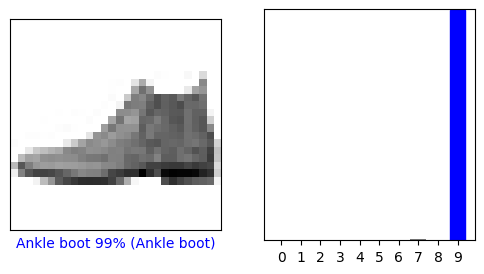

In [101]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

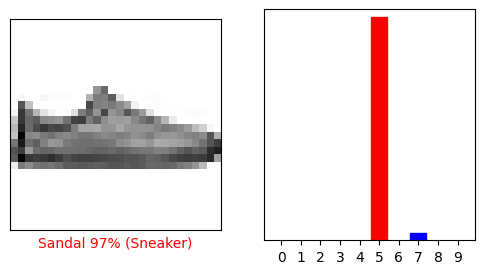

In [102]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

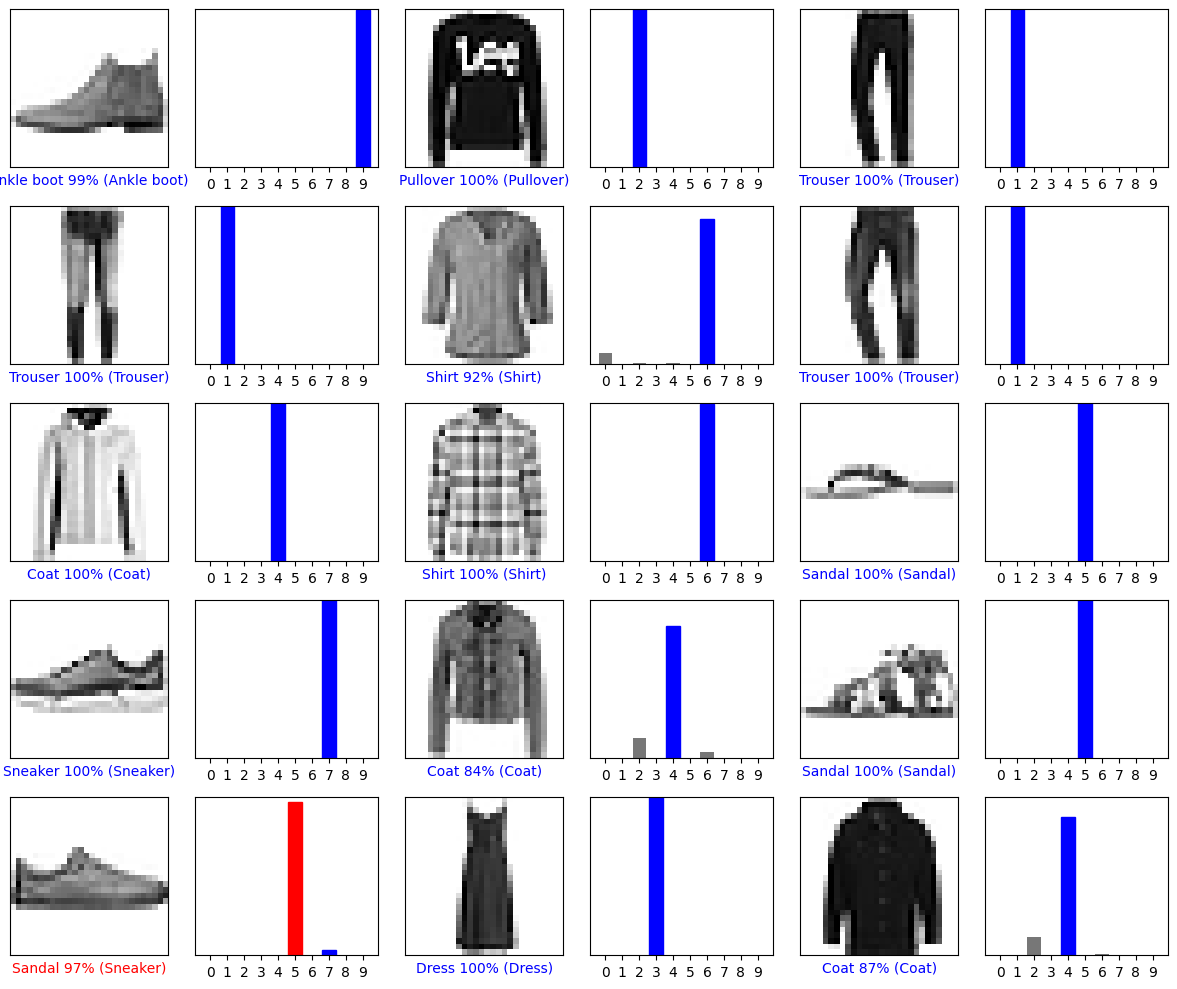

In [103]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [104]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [105]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [107]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 59ms/step
[[3.4170755e-06 1.0594310e-10 9.9789435e-01 9.3825489e-11 1.7019744e-03
  3.8703527e-15 4.0026469e-04 7.7889853e-20 6.4308781e-10 8.2844479e-18]]


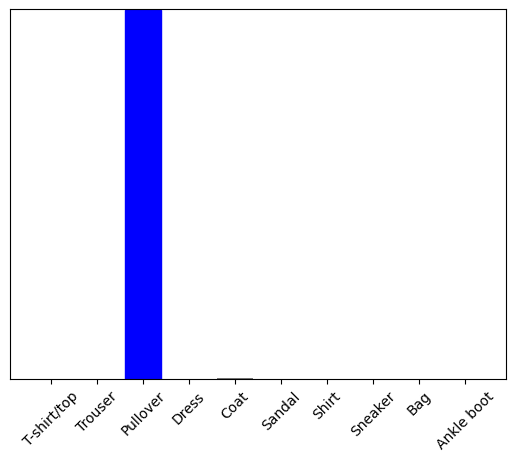

In [108]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [109]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected.

## Refrences

[Basic classification: Classify images of clothing | Tensorflow ](https://www.tensorflow.org/tutorials/keras/classification)

[Custom Models, Layers, and Loss Functions with TensorFlow |
DeepLearning.AI](https://www.coursera.org/learn/custom-distributed-training-with-tensorflow)